# Decision tree Analysis on Titanic Dataset

In [220]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
# Reading the data into datarframe
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [222]:
# check for any null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [223]:
# Filling null values in age column with mean value
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
# dropping unnecessary columns
df_train.drop(columns = ['Cabin','Name','Ticket','PassengerId'],inplace=True)

In [224]:
# Removed rows in which null are present 
df_train = df_train[df_train['Embarked'].notna()]

In [225]:
# Using get_dummies to convert categorical variables
df_train = pd.get_dummies(data = df_train, columns =['Sex','Embarked'])

In [226]:
y = df_train['Survived']
X = df_train.drop(columns=['Survived'])

In [227]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=42,test_size=0.01)

In [228]:
# Fitting the data
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import confusion_matrix
clf = DecisionTreeClassifier(max_depth=4).fit(X_train,Y_train)
y_pred = clf.predict(X_train)

In [229]:
# checking accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy on Train data without using Ensemble Technique: ' ,accuracy_score(Y_train,y_pred)*100)

Accuracy on Train data without using Ensemble Technique:  83.4090909090909


In [230]:
confusion_matrix_normal = confusion_matrix(Y_train,y_pred)
confusion_matrix_normal

array([[495,  50],
       [ 96, 239]])

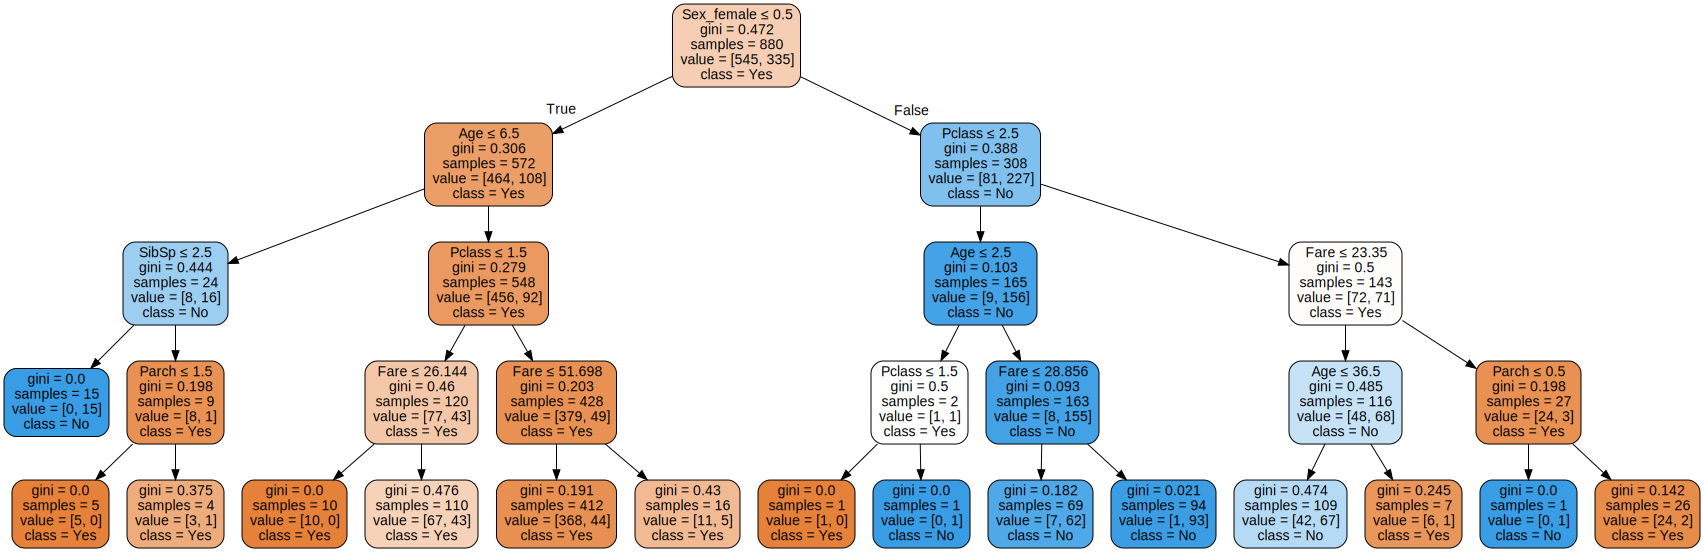

In [231]:
# Visualizing decision tree
feat_names = X.columns
targ_names = ['Yes','No']
import graphviz

data = export_graphviz(clf,out_file=None,feature_names=feat_names,class_names=targ_names,   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph

## Predicting for Test Data

#### Cleaning the test data in same way as we did for train data

In [232]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [233]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test = df_test[df_test['Fare'].notna()]
df_test.drop(columns = ['Cabin','Name','Ticket','PassengerId'],inplace=True)
# Using get_dummies to convert categorical variables
df_test = pd.get_dummies(data = df_test, columns =['Sex','Embarked'])

In [234]:
y_pred = clf.predict(df_test)

In [235]:
# Prediction Output
predicted_table = pd.DataFrame(y_pred)
predicted_table.head()

,0
0,0
1,0
2,0
3,0
4,1


# Using Ensemble Techniques

## Adaboost

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=42,test_size=0.01)

In [237]:
# n_estimators is to specify total number of trees in the forest.
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [238]:
predictions = classifier.predict(X_train)

In [239]:
confusion_matrix(Y_train,predictions)

array([[486,  59],
       [ 72, 263]])

In [240]:
print('Accuracy on Train data using AdaBoost: ' ,accuracy_score(Y_train,predictions)*100)

Accuracy on Train data using AdaBoost:  85.11363636363637


## Gradient Boosting Technique

In [241]:
from sklearn.ensemble import GradientBoostingClassifier
# Give different learning rates to check the performance of the model at different learning dates
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=learning_rate, max_features=2, max_depth=3, random_state=48)
    gb_clf.fit(X_train, Y_train)
    y_pred = gb_clf.predict(X_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(accuracy_score(Y_train, y_pred)))

Learning rate:  0.05
Accuracy score (training): 0.853
Learning rate:  0.075
Accuracy score (training): 0.869
Learning rate:  0.1
Accuracy score (training): 0.881
Learning rate:  0.25
Accuracy score (training): 0.926
Learning rate:  0.5
Accuracy score (training): 0.951
Learning rate:  0.75
Accuracy score (training): 0.964


## XGBoost

In [242]:
from xgboost import XGBClassifier

In [243]:
#instantiate model and train
model = XGBClassifier(learning_rate = 0.1, n_estimators=200, max_depth=3)
model.fit(X_train, Y_train)

# make predictions for train set
y_pred = model.predict(X_train)

accuracy = accuracy_score(Y_train, y_pred)
print("Accuracy Using XGBoost: %.2f%%" % (accuracy * 100.0))

Accuracy Using XGBoost: 89.66%


### The Best Accuracy achieved is with Gradient Boosting - 96.4%